### Salary prediction using Python
#### The model that I have used for prediction is Linear Regression provided by Scikit-Learn library.

In [1]:
# importing required libraries:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline 

from sklearn import metrics
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings("ignore")

In [2]:
# loading dataset
data = pd.read_csv('salary_dataset.csv')
data.reset_index()
data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [3]:
data.shape

(35, 2)

In [4]:
data.describe()

,YearsExperience,Salary
count,35.000000,35.000000
mean,6.308571,83945.600000
std,3.618610,32162.673003
min,1.100000,37731.000000
25%,3.450000,57019.000000
50%,5.300000,81363.000000
75%,9.250000,113223.500000
max,13.500000,139465.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  35 non-null     float64
 1   Salary           35 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 688.0 bytes


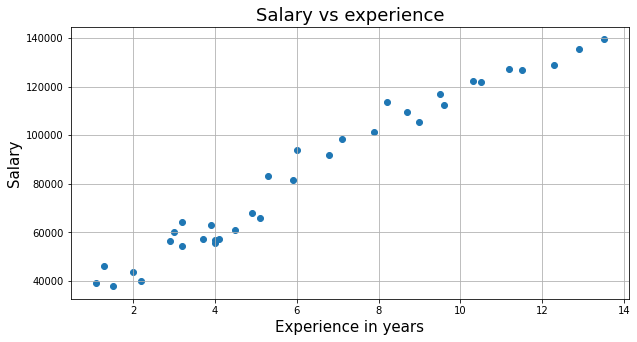

In [6]:
# plotting salary vs experience scatter:
plt.figure(figsize = (10, 5))
plt.scatter(data['YearsExperience'], data['Salary'])
plt.xlabel('Experience in years', size = 15)
plt.ylabel('Salary', size = 15)
plt.title('Salary vs experience', size = 18)
plt.grid()
plt.show()

In [7]:
X = data[['YearsExperience']]
y = data[['Salary']]

In [8]:
# splitting data into training and testing datasets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state  = 43)

In [9]:
# fitting data into model:
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

LinearRegression()

In [10]:
# calculating intercept and coefficient:
print('Linear reggression intercept: ', linear_regression.intercept_)
print('Linear regression coefficient: ', linear_regression.coef_)

Linear reggression intercept:  [28257.63391459]
Linear regression coefficient:  [[8853.98504088]]


In [11]:
# predicting the salary on testing dataset:
predictions = linear_regression.predict(X_test).ravel()

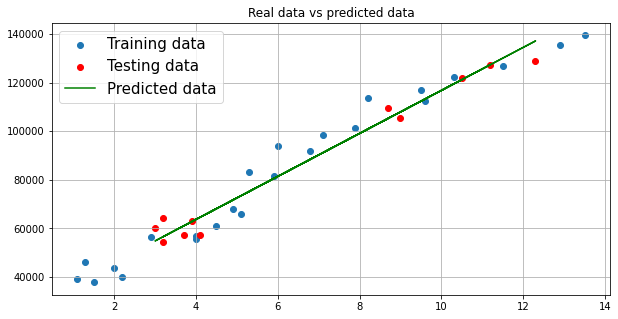

In [12]:
# plotting training, testing and predicted values:
plt.figure(figsize = (10, 5))
plt.scatter(X_train, y_train, label = 'Training data')
plt.scatter(X_test, y_test, c = 'r', label = 'Testing data')
plt.plot(X_test, predictions, c = 'g', label = 'Predicted data')
plt.title("Real data vs predicted data")
plt.legend(prop = {'size': 15})
plt.grid()
plt.show()

In [13]:
# calculating MAE, MSE and RMSE:
print("Mean absolute error (MAE):", round(metrics.mean_absolute_error(y_test,predictions), 2))
print("Mean square error (MSE):", round(metrics.mean_squared_error(y_test,predictions), 2))
print("Root mean square error (RMSE):", round(np.sqrt(metrics.mean_squared_error(y_test,predictions)), 2))

Mean absolute error (MAE): 3881.2
Mean square error (MSE): 23558919.23
Root mean square error (RMSE): 4853.75


In [14]:
# calculating R-squared value:
print("R-squared value of predictions:",round(metrics.r2_score(y_test,predictions), 2))

R-squared value of predictions: 0.97


In [15]:
# calculating model accuracy for training and testing datasets:
print('The model accuracy score for training data:', round(linear_regression.score(X_train, y_train)*100, 2),'%')
print('The model accuracy score for testing data:', round(linear_regression.score(X_test, y_test)*100, 2),'%')

The model accuracy score for training data: 96.11 %
The model accuracy score for testing data: 97.43 %


In [16]:
# comparing original and predicted values:
column_1 = X_test.values.ravel()
column_2 = y_test.values.ravel()
column_3 = predictions
data2 = pd.DataFrame({
    'Experience in years': column_1,
    'Original salary': column_2, 
    'Predicted salary': column_3})
data2

,Experience in years,Original salary,Predicted salary
0,3.7,57189,61017.378566
1,9.0,105582,107943.499282
2,10.5,121872,121224.476844
3,3.0,60150,54819.589037
4,3.2,54445,56590.386045
5,12.3,128765,137161.649917
6,3.9,63218,62788.175574
7,11.2,127345,127422.266372
8,3.2,64445,56590.386045
9,4.1,57081,64558.972582


#### Thank you!